# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [3]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

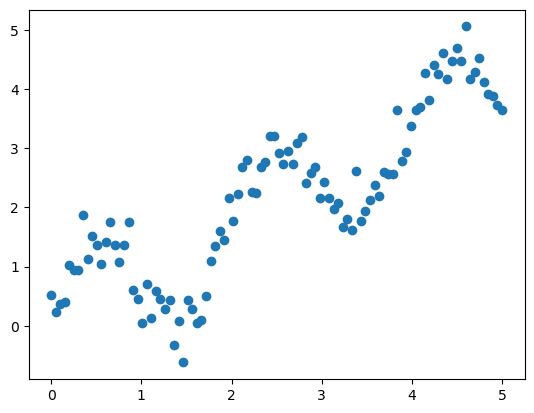

In [4]:
plt.scatter(x,y)

#### nonlinear

In [5]:
regr_lin = LinearRegression()

In [6]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [7]:
regr_lin.fit(X,y)

LinearRegression()

0.5489036457390447


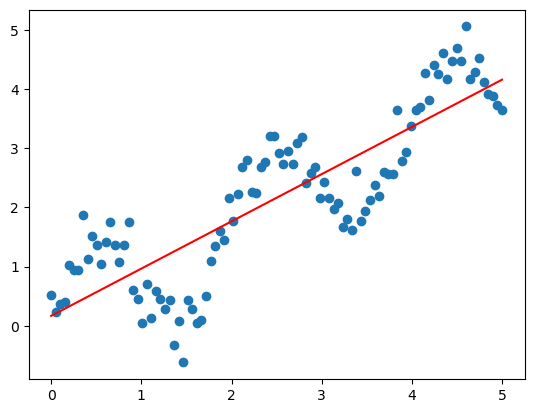

In [8]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

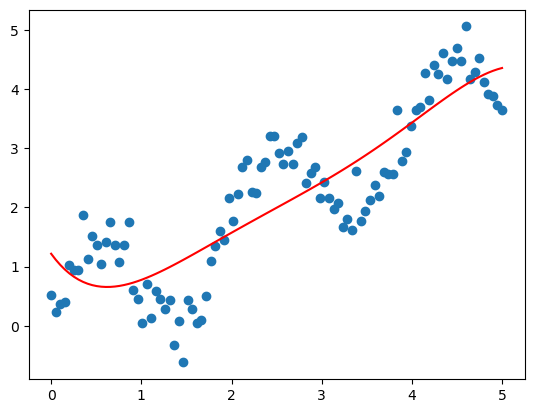

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.11198865  2.49587709 -1.00403996  0.19179765 -0.01378058]
interception:  1.217027806893916


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.21702781, 1.11659999, 1.0281462 , 0.9509346 , 0.88426221,
       0.82745439, 0.77986425, 0.74087215, 0.70988514, 0.68633642,
       0.66968477, 0.65941405, 0.65503263, 0.65607285, 0.66209048,
       0.67266417, 0.68739493, 0.70590556, 0.7278401 , 0.75286332,
       0.78066015, 0.81093516, 0.84341197, 0.87783277, 0.91395773,
       0.95156448, 0.99044754, 1.03041782, 1.07130203, 1.11294218,
       1.15519498, 1.19793137, 1.2410359 , 1.28440627, 1.32795269,
       1.37159743, 1.41527421, 1.45892768, 1.5025129 , 1.54599474,
       1.5893474 , 1.63255382, 1.67560516, 1.71850026, 1.76124506,
       1.8038521 , 1.84633998, 1.88873276, 1.93105946, 1.97335355,
       2.0156523 , 2.05799637, 2.10042914, 2.14299628, 2.18574511,
       2.22872413, 2.27198242, 2.31556914, 2.35953296, 2.40392154,
       2.44878096, 2.49415519, 2.54008554, 2.58661014, 2.63376337,
       2.68157531, 2.73007123, 2.77927103, 2.82918868, 2.87983171,
       2.93120063, 2.98328842, 3.03607997, 3.08955152, 3.14367

In [16]:
regr_poly.predict(X_poly)

array([1.21702781, 1.11659999, 1.0281462 , 0.9509346 , 0.88426221,
       0.82745439, 0.77986425, 0.74087215, 0.70988514, 0.68633642,
       0.66968477, 0.65941405, 0.65503263, 0.65607285, 0.66209048,
       0.67266417, 0.68739493, 0.70590556, 0.7278401 , 0.75286332,
       0.78066015, 0.81093516, 0.84341197, 0.87783277, 0.91395773,
       0.95156448, 0.99044754, 1.03041782, 1.07130203, 1.11294218,
       1.15519498, 1.19793137, 1.2410359 , 1.28440627, 1.32795269,
       1.37159743, 1.41527421, 1.45892768, 1.5025129 , 1.54599474,
       1.5893474 , 1.63255382, 1.67560516, 1.71850026, 1.76124506,
       1.8038521 , 1.84633998, 1.88873276, 1.93105946, 1.97335355,
       2.0156523 , 2.05799637, 2.10042914, 2.14299628, 2.18574511,
       2.22872413, 2.27198242, 2.31556914, 2.35953296, 2.40392154,
       2.44878096, 2.49415519, 2.54008554, 2.58661014, 2.63376337,
       2.68157531, 2.73007123, 2.77927103, 2.82918868, 2.87983171,
       2.93120063, 2.98328842, 3.03607997, 3.08955152, 3.14367

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [17]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [18]:
sigma = 0.3

In [19]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [20]:
regr_rbf = LinearRegression()

In [21]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

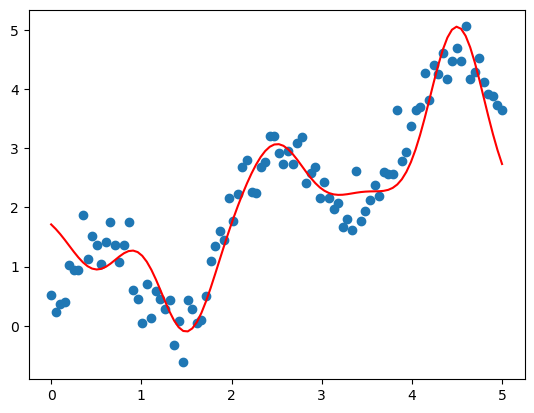

In [22]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [23]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.00468831 -2.06437754  1.11501456  0.28911743  3.09284192]
interception:  1.9632864394096867


#### Comparison

In [24]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

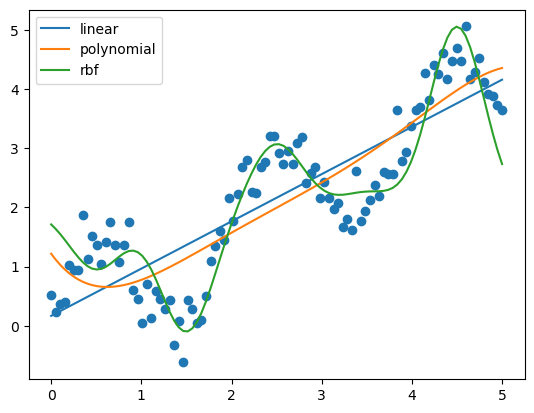

In [25]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [26]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5489036457390447


In [27]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.48544175835871706


In [28]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23796003201686294
